In [73]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [74]:
# import the dataset using pandas and store in a variable name

df = pd.read_csv("dataset.csv")
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


## Data Overview

This phase involves/provides a high-level summary and understanding of the key characteristics of a dataset. The function .info() helps get the information about the datatypes involved in the dataset i.e each of the columns datatype

In [75]:
# getting the information about each attribute in the dataset using .info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


The code below shows the statistical analysis (mean, standard deviation, minimum, maximum etc) of the columns (attributes) in the dataset excluding the date and time column. 

In [76]:
# outputing the statistical summary of the dataset

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


In [77]:
# dropping the last two columns using .drop() function

df = df.drop("User_ID", axis=True)

df["Gender"] = df["Gender"].astype("category")
df["Gender"] = df["Gender"].cat.codes
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190,94,29,105,40.8,231
1,0,20,166,60,14,94,40.3,66
2,1,69,179,79,5,88,38.7,26
3,0,34,179,71,13,100,40.5,71
4,0,27,154,58,10,81,39.8,35


In [78]:
# Separating the features and target class

X = df.drop("Calories", axis=1)
y = df["Calories"]

print(X.shape)
print(y.shape)

(15000, 7)
(15000,)


In [79]:
# spliting the dataset into 80% for training and 20% for testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12000, 7)
(12000,)
(3000, 7)
(3000,)


<AxesSubplot:>

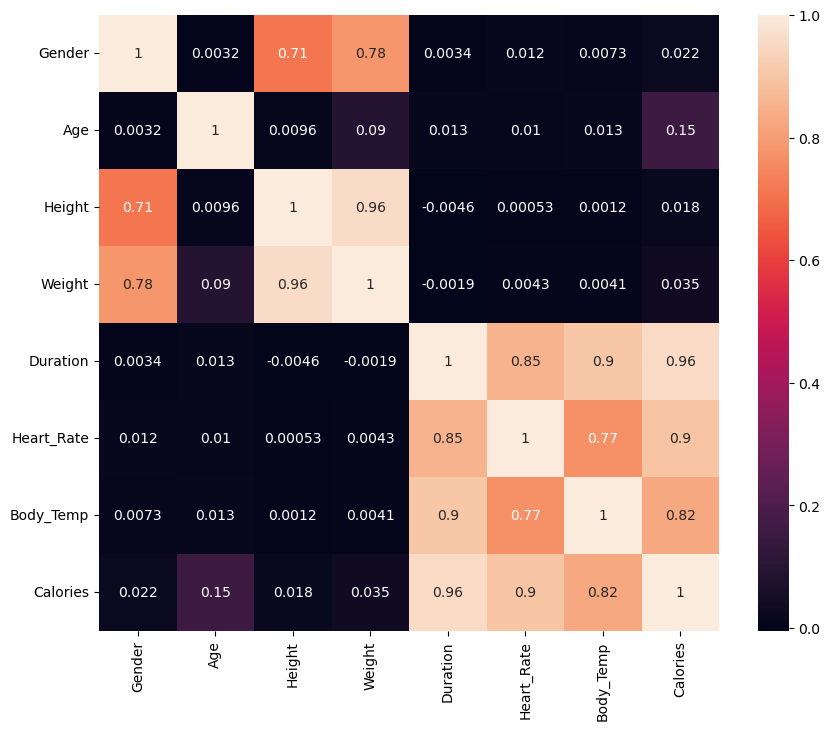

In [89]:
# checking for linearity of the features and target value
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True)

In [81]:
# Import necessary libraries

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *

# define and train the linear regression model
model = LinearRegression()

# fitting the model to the training data
model.fit(x_train, y_train)

LinearRegression()

In [82]:
# Outputing the intercept and coeficient of each features

print("Inercept: ", model.intercept_)
print()
print("Coefficient: ", model.coef_)

Inercept:  466.95575475967104

Coefficient:  [ -1.39183999   0.4973189   -0.19414821   0.31303426   6.64253063
   1.98550126 -17.00087997]


In [83]:
cdf = pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])
cdf

,Coeff
Gender,-1.391840
Age,0.497319
Height,-0.194148
Weight,0.313034
Duration,6.642531
Heart_Rate,1.985501
Body_Temp,-17.000880


In [84]:
# Make predictions on the test set. this refer to the predicted values made by the model on the test set

predictions = model.predict(x_test)
predictions

array([ 25.34818428, 182.95274339,  52.39544869, ...,   3.16860623,
       204.43702455, 129.58829894])

## Visualization of the Predictions and the Actual Values

/Users/mac/Public/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Actual Values vs Predicted Values'}, xlabel='Actual Values', ylabel='Predicted Values'>

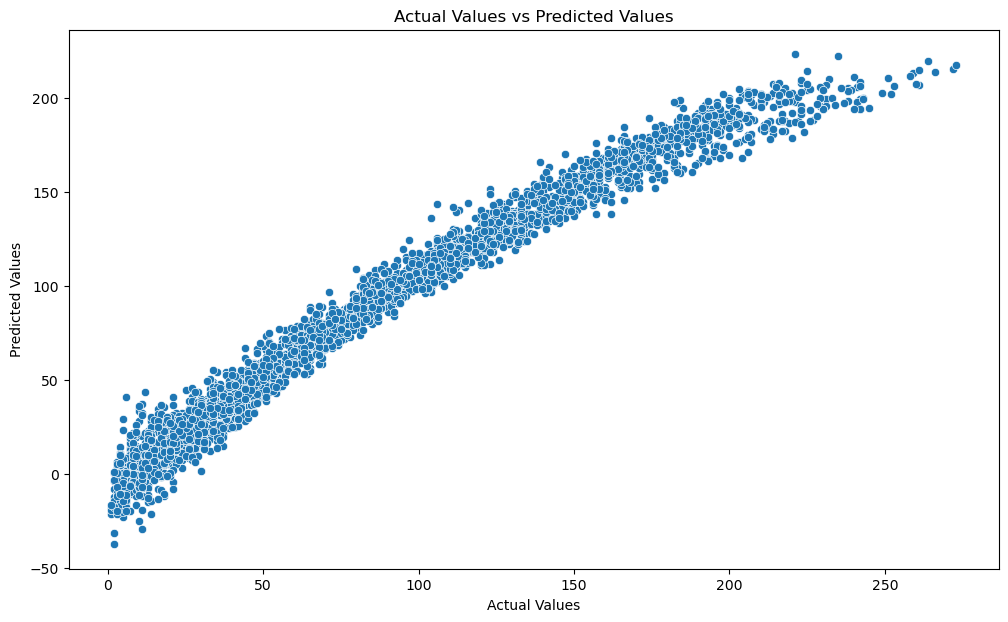

In [85]:
plt.figure(figsize=(12,7))
plt.title("Actual Values vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
sns.scatterplot(y_test, predictions)

In [86]:
# Evaluating the model using standard metrics

from sklearn.metrics import *

# MEAN ABSOLUTE ERROR 
mae = mean_absolute_error(y_test,predictions)
mae

# MEAN SQUARE ERROR
mse = mean_squared_error(y_test,predictions)
mse

# ROOT MEAN SQUARE ERROR
rmse = np.sqrt(mse)

# R SQUAREd
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print("Mean Absolute Error: ", mae)
print()
print("Mean Squared Error: ", mse)
print()
print("Root Mean Squared Error: ", rmse)
print()
print("Explained Variance Score: ", r2)

Mean Absolute Error:  8.48550026620553

Mean Squared Error:  132.17626991429137

Root Mean Squared Error:  11.496793897182439

Explained Variance Score:  0.9664761983139258
